Use shift+enter to run each cell

In [1]:
import tensorflow as tf
import tensorflow_lattice as tfl
import numpy as np
import matplotlib.pyplot as plt

Check TensorFlow version. We expect 1.3.0.

In [2]:
print("You have version %s" % tf.__version__)

You have version 1.4.1


In [10]:
# Reset the default graph to clean up things.
tf.reset_default_graph()

# placeholder is a way to feed a data from python to a computational graph.
# x is a 2d tensor with shape [?, 2].
#
# In TensorFlow, the first dimension is usually reserved for a batch size.
# Often we want to tune the batch size for SGD to maximize the througput during
# the training, batch_size is usually set to "None" to let TensorFlow know the
# size is unknown when we create the graph.
x = tf.placeholder(tf.float32, shape=(None, 2))

# Here we use lattice_layer to define a lattice model.
# lattice_layer expects 2d tensor [batch_size, input_dim] as an input.
# In this case, since x's shape is [?, 2], batch_size is unknown, but
# input_dim == 2.
# Here we set lattice_sizes = (2, 2) which means this lattice_layer defines
# 2 x 2 lattice.
# lattice_layer returns 4 elements: 
#  1. output tensor
#  2. lookup param tensor
#  3. Projection operator
#  4. regularization loss (scalar tensor)
#
# We will cover other three components later, so let's focus on the output
# tensor.
# The output tensor is the output of this layer. Its shape is
# [batch_size, output_dim], where the default output_dim == 1.
# So in this case, y's shape is [?, 1].
(y, _, _, _) = tfl.lattice_layer(x, lattice_sizes=(2, 2))

# Run Session to get the value. Feel free to feed different values other than
# [[0.0, 0.0]].
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result = sess.run(y, feed_dict={x: [[0.0, 0.0]]})

# We expect -0.5 as an output
assert (result[0][0]) < 1e-7
print(result)

[[0.]]


Check whether matplotlib is working

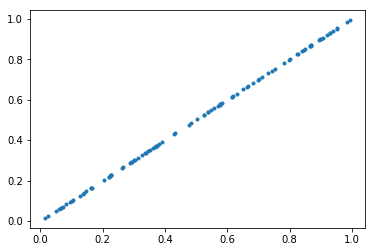

In [11]:
%matplotlib inline
# create some data using numpy. y = x * 0.1 + 0.3 + noise
x = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x))
y = x

# plot it
plt.plot(x, y, '.')